# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import pylab
import scipy.stats as stats
%matplotlib inline

# Upload Datasets

<AxesSubplot:>

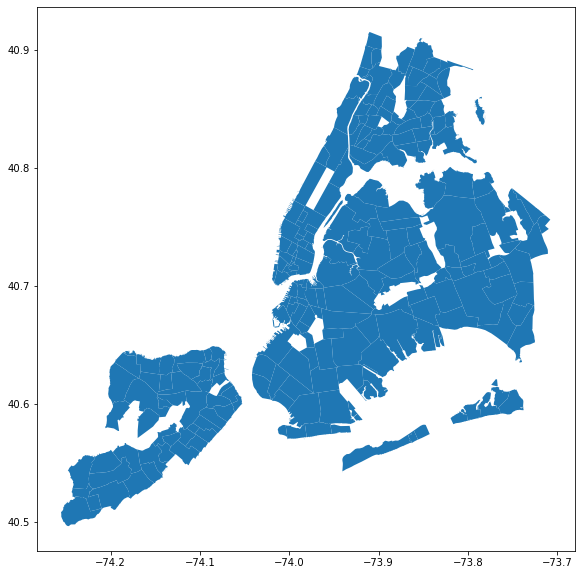

In [2]:
neighbourhoods = gpd.read_file('neighbourhoods.geojson')
neighbourhoods.plot(figsize=(10,10))

In [3]:
station = pd.read_csv('stationlocation.csv')
station.head()

,ogc_fid,station_id,complex_id,gtfs_stop_id,division,line,stop_name,borough,daytime_routes,structure,gtfs_latitude,gtfs_longitude,north_direction_label,south_direction_label
0,1,1.0,1,R01,BMT,Astoria,Astoria - Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034,NaN,Manhattan
1,2,2.0,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843,Ditmars Blvd,Manhattan
2,3,3.0,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479,Astoria - Ditmars Blvd,Manhattan
3,4,4.0,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508,Astoria - Ditmars Blvd,Manhattan
4,5,5.0,5,R06,BMT,Astoria,36 Av,Q,N W,Elevated,40.756804,-73.929575,Astoria - Ditmars Blvd,Manhattan


In [4]:
from shapely.geometry import Point

Geometrysta = [Point(xy) for xy in zip(station.gtfs_longitude, station.gtfs_latitude)]
stationgeo = gpd.GeoDataFrame(station,geometry=Geometrysta,crs={'init': 'epsg:4326'})

/anaconda3/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

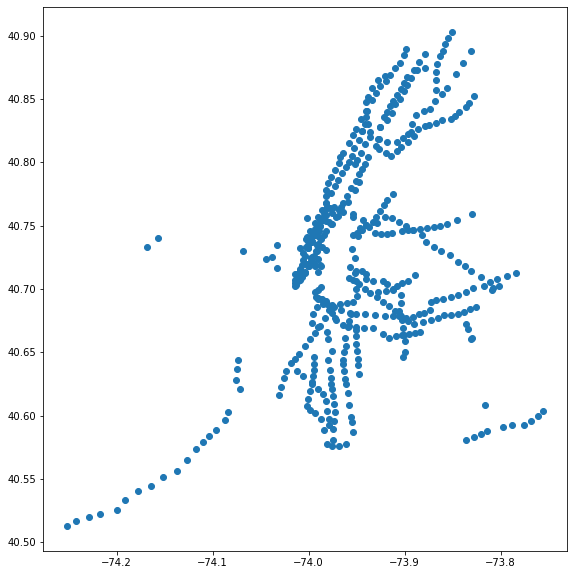

In [5]:
stationgeo.plot(figsize=(10,10))

In [6]:
'''citibike1901 = pd.read_csv('citibike/201901-citibike-tripdata.csv')
citibike1902 = pd.read_csv('citibike/201902-citibike-tripdata.csv')
citibike1903 = pd.read_csv('citibike/201903-citibike-tripdata.csv')
citibike1904 = pd.read_csv('citibike/201904-citibike-tripdata.csv')
citibike1905 = pd.read_csv('citibike/201905-citibike-tripdata.csv')
citibike1906 = pd.read_csv('citibike/201906-citibike-tripdata.csv')
citibike1907 = pd.read_csv('citibike/201907-citibike-tripdata.csv')
citibike1908 = pd.read_csv('citibike/201908-citibike-tripdata.csv')
citibike1909 = pd.read_csv('citibike/JC-201909-citibike-tripdata.csv')
citibike1910 = pd.read_csv('citibike/JC-201910-citibike-tripdata.csv')
citibike1911 = pd.read_csv('citibike/JC-201911-citibike-tripdata.csv')
citibike1912 = pd.read_csv('citibike/JC-201912-citibike-tripdata.csv')'''

"citibike1901 = pd.read_csv('citibike/201901-citibike-tripdata.csv')\ncitibike1902 = pd.read_csv('citibike/201902-citibike-tripdata.csv')\ncitibike1903 = pd.read_csv('citibike/201903-citibike-tripdata.csv')\ncitibike1904 = pd.read_csv('citibike/201904-citibike-tripdata.csv')\ncitibike1905 = pd.read_csv('citibike/201905-citibike-tripdata.csv')\ncitibike1906 = pd.read_csv('citibike/201906-citibike-tripdata.csv')\ncitibike1907 = pd.read_csv('citibike/201907-citibike-tripdata.csv')\ncitibike1908 = pd.read_csv('citibike/201908-citibike-tripdata.csv')\ncitibike1909 = pd.read_csv('citibike/JC-201909-citibike-tripdata.csv')\ncitibike1910 = pd.read_csv('citibike/JC-201910-citibike-tripdata.csv')\ncitibike1911 = pd.read_csv('citibike/JC-201911-citibike-tripdata.csv')\ncitibike1912 = pd.read_csv('citibike/JC-201912-citibike-tripdata.csv')"

In [7]:
citi = pd.read_csv('citibike/201901-citibike-tripdata.csv')

In [8]:
citi.head()
# Trip Duration (seconds)
# User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)
# Gender (Zero=unknown; 1=male; 2=female)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,320,2019-01-01 00:01:47.4010,2019-01-01 00:07:07.5810,3160.0,Central Park West & W 76 St,40.778968,-73.973747,3283.0,W 89 St & Columbus Ave,40.788221,-73.970416,15839,Subscriber,1971,1
1,316,2019-01-01 00:04:43.7360,2019-01-01 00:10:00.6080,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,40.747804,-73.973442,32723,Subscriber,1964,1
2,591,2019-01-01 00:06:03.9970,2019-01-01 00:15:55.4380,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154.0,E 77 St & 3 Ave,40.773142,-73.958562,27451,Subscriber,1987,1
3,2719,2019-01-01 00:07:03.5450,2019-01-01 00:52:22.6500,504.0,1 Ave & E 16 St,40.732219,-73.981656,3709.0,W 15 St & 6 Ave,40.738046,-73.996430,21579,Subscriber,1990,1
4,303,2019-01-01 00:07:35.9450,2019-01-01 00:12:39.5020,229.0,Great Jones St,40.727434,-73.993790,503.0,E 20 St & Park Ave,40.738274,-73.987520,35379,Subscriber,1979,1


In [9]:
citi.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,9.672870e+05,967269.000000,967287.000000,967287.000000,967269.000000,967287.000000,967287.000000,967287.000000,967287.000000,967287.000000
mean,7.758409e+02,1620.420794,40.737268,-73.982138,1608.750936,40.737125,-73.982350,28917.729181,1978.841311,1.177713
std,7.144814e+03,1454.906830,0.030353,0.018547,1453.416308,0.030117,0.018604,6223.319197,12.205457,0.465508
min,6.100000e+01,72.000000,40.655400,-74.017134,72.000000,40.655400,-74.046305,14529.000000,1886.000000,0.000000
25%,3.090000e+02,383.000000,40.718170,-73.994564,382.000000,40.718170,-73.994618,25940.000000,1969.000000,1.000000
50%,5.040000e+02,508.000000,40.739323,-73.984907,507.000000,40.739126,-73.985180,30817.000000,1981.000000,1.000000
75%,8.490000e+02,3263.000000,40.757148,-73.972826,3263.000000,40.756800,-73.973442,34031.000000,1989.000000,1.000000
max,2.679841e+06,3728.000000,40.863000,-73.884000,3728.000000,40.866000,-73.881000,37889.000000,2003.000000,2.000000


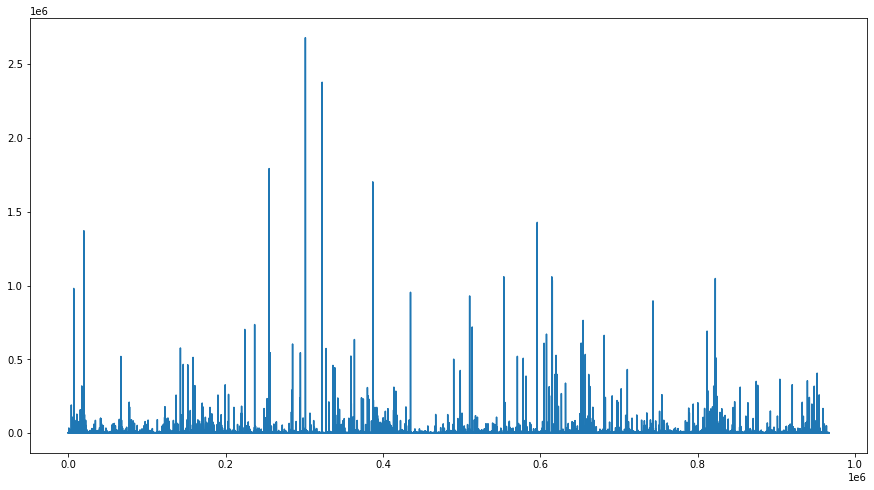

In [10]:
plt.figure(figsize=(15,8))
plt.plot(citi.tripduration)

In [11]:
sum(citi.tripduration<0)

0

In [12]:
def plot_loghist(x, bins): #introduce a function for plotting a log-scale histogram
  #it ensures log-scale binning and label on the original scale
    logbins = np.logspace(np.log10(x.min()),np.log10(x.max()),bins)
    plt.hist(x, bins=logbins)
    plt.xscale('log')

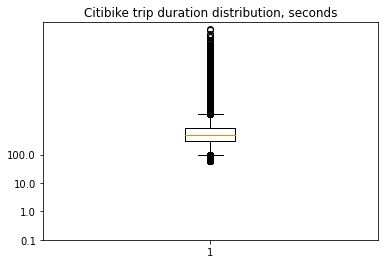

In [13]:
ax = plt.subplot(1, 1, 1)
ax.boxplot(np.log10(citi.tripduration), whis=[1, 99]) #box plot of the log trip_distance with 1 and 99 percentiles and the outliers beyond them
ax.set_yticks(np.arange(-1, 3))
ax.set_yticklabels(10.0**np.arange(-1, 3, 1))
ax.set_title('Citibike trip duration distribution, seconds')
plt.show()

In [14]:
citi.tripduration.quantile(0.01)

94.0

In [15]:
citi.tripduration.quantile(0.99)

2692.0

In [16]:
len(citi[citi.tripduration > 7200])

1613

In [17]:
citi.shape

(967287, 15)

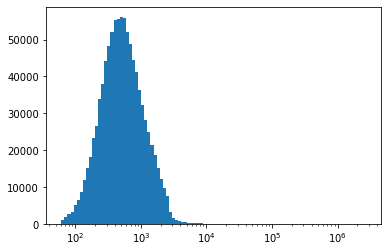

In [18]:
plot_loghist(citi.tripduration, 100)

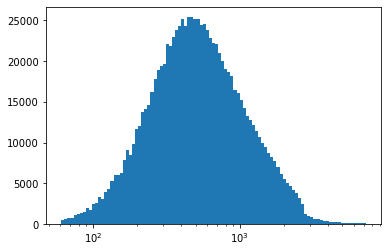

In [19]:
plot_loghist(citi[citi.tripduration<7200].tripduration, 100)

In [11]:
citi = citi[citi.tripduration<7200]

### focus on start location & subway station

In [12]:
from shapely.geometry import Point

Geometry = [Point(xy) for xy in zip(citi['start station longitude'], citi['start station latitude'])]
citistartgeo = gpd.GeoDataFrame(citi,geometry=Geometry,crs={'init': 'epsg:4326'})

/anaconda3/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [13]:
citistartgeo.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,geometry
0,320,2019-01-01 00:01:47.4010,2019-01-01 00:07:07.5810,3160.0,Central Park West & W 76 St,40.778968,-73.973747,3283.0,W 89 St & Columbus Ave,40.788221,-73.970416,15839,Subscriber,1971,1,POINT (-73.97375 40.77897)
1,316,2019-01-01 00:04:43.7360,2019-01-01 00:10:00.6080,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,40.747804,-73.973442,32723,Subscriber,1964,1,POINT (-73.97771 40.75187)
2,591,2019-01-01 00:06:03.9970,2019-01-01 00:15:55.4380,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154.0,E 77 St & 3 Ave,40.773142,-73.958562,27451,Subscriber,1987,1,POINT (-73.97667 40.78525)
3,2719,2019-01-01 00:07:03.5450,2019-01-01 00:52:22.6500,504.0,1 Ave & E 16 St,40.732219,-73.981656,3709.0,W 15 St & 6 Ave,40.738046,-73.996430,21579,Subscriber,1990,1,POINT (-73.98166 40.73222)
4,303,2019-01-01 00:07:35.9450,2019-01-01 00:12:39.5020,229.0,Great Jones St,40.727434,-73.993790,503.0,E 20 St & Park Ave,40.738274,-73.987520,35379,Subscriber,1979,1,POINT (-73.99379 40.72743)


In [14]:
Geometry = [Point(xy) for xy in zip(citi['end station longitude'], citi['end station latitude'])]
citiendgeo = gpd.GeoDataFrame(citi,geometry=Geometry,crs={'init': 'epsg:4326'})

citiendgeo.head()

/anaconda3/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,geometry
0,320,2019-01-01 00:01:47.4010,2019-01-01 00:07:07.5810,3160.0,Central Park West & W 76 St,40.778968,-73.973747,3283.0,W 89 St & Columbus Ave,40.788221,-73.970416,15839,Subscriber,1971,1,POINT (-73.97042 40.78822)
1,316,2019-01-01 00:04:43.7360,2019-01-01 00:10:00.6080,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,40.747804,-73.973442,32723,Subscriber,1964,1,POINT (-73.97344 40.74780)
2,591,2019-01-01 00:06:03.9970,2019-01-01 00:15:55.4380,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154.0,E 77 St & 3 Ave,40.773142,-73.958562,27451,Subscriber,1987,1,POINT (-73.95856 40.77314)
3,2719,2019-01-01 00:07:03.5450,2019-01-01 00:52:22.6500,504.0,1 Ave & E 16 St,40.732219,-73.981656,3709.0,W 15 St & 6 Ave,40.738046,-73.996430,21579,Subscriber,1990,1,POINT (-73.99643 40.73805)
4,303,2019-01-01 00:07:35.9450,2019-01-01 00:12:39.5020,229.0,Great Jones St,40.727434,-73.993790,503.0,E 20 St & Park Ave,40.738274,-73.987520,35379,Subscriber,1979,1,POINT (-73.98752 40.73827)


In [15]:
from shapely.geometry import Point

Geometry = [Point(xy) for xy in zip(citi['start station longitude'], citi['start station latitude'])]
citigeo = gpd.GeoDataFrame(citi,geometry=Geometry,crs={'init': 'epsg:4326'})

/anaconda3/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [16]:
citigeo['start_geo'] = citigeo.geometry
citigeo.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,geometry,start_geo
0,320,2019-01-01 00:01:47.4010,2019-01-01 00:07:07.5810,3160.0,Central Park West & W 76 St,40.778968,-73.973747,3283.0,W 89 St & Columbus Ave,40.788221,-73.970416,15839,Subscriber,1971,1,POINT (-73.97375 40.77897),POINT (-73.97375 40.77897)
1,316,2019-01-01 00:04:43.7360,2019-01-01 00:10:00.6080,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,40.747804,-73.973442,32723,Subscriber,1964,1,POINT (-73.97771 40.75187),POINT (-73.97771 40.75187)
2,591,2019-01-01 00:06:03.9970,2019-01-01 00:15:55.4380,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154.0,E 77 St & 3 Ave,40.773142,-73.958562,27451,Subscriber,1987,1,POINT (-73.97667 40.78525),POINT (-73.97667 40.78525)
3,2719,2019-01-01 00:07:03.5450,2019-01-01 00:52:22.6500,504.0,1 Ave & E 16 St,40.732219,-73.981656,3709.0,W 15 St & 6 Ave,40.738046,-73.996430,21579,Subscriber,1990,1,POINT (-73.98166 40.73222),POINT (-73.98166 40.73222)
4,303,2019-01-01 00:07:35.9450,2019-01-01 00:12:39.5020,229.0,Great Jones St,40.727434,-73.993790,503.0,E 20 St & Park Ave,40.738274,-73.987520,35379,Subscriber,1979,1,POINT (-73.99379 40.72743),POINT (-73.99379 40.72743)


In [17]:
Geometry = [Point(xy) for xy in zip(citi['end station longitude'], citi['end station latitude'])]
citigeo = gpd.GeoDataFrame(citi,geometry=Geometry,crs={'init': 'epsg:4326'})

/anaconda3/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [52]:
citigeo.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,geometry,start_geo
0,320,2019-01-01 00:01:47.4010,2019-01-01 00:07:07.5810,3160.0,Central Park West & W 76 St,40.778968,-73.973747,3283.0,W 89 St & Columbus Ave,40.788221,-73.970416,15839,Subscriber,1971,1,POINT (-73.97042 40.78822),POINT (-73.97375 40.77897)
1,316,2019-01-01 00:04:43.7360,2019-01-01 00:10:00.6080,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,40.747804,-73.973442,32723,Subscriber,1964,1,POINT (-73.97344 40.74780),POINT (-73.97771 40.75187)
2,591,2019-01-01 00:06:03.9970,2019-01-01 00:15:55.4380,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154.0,E 77 St & 3 Ave,40.773142,-73.958562,27451,Subscriber,1987,1,POINT (-73.95856 40.77314),POINT (-73.97667 40.78525)
3,2719,2019-01-01 00:07:03.5450,2019-01-01 00:52:22.6500,504.0,1 Ave & E 16 St,40.732219,-73.981656,3709.0,W 15 St & 6 Ave,40.738046,-73.996430,21579,Subscriber,1990,1,POINT (-73.99643 40.73805),POINT (-73.98166 40.73222)
4,303,2019-01-01 00:07:35.9450,2019-01-01 00:12:39.5020,229.0,Great Jones St,40.727434,-73.993790,503.0,E 20 St & Park Ave,40.738274,-73.987520,35379,Subscriber,1979,1,POINT (-73.98752 40.73827),POINT (-73.99379 40.72743)


<AxesSubplot:>

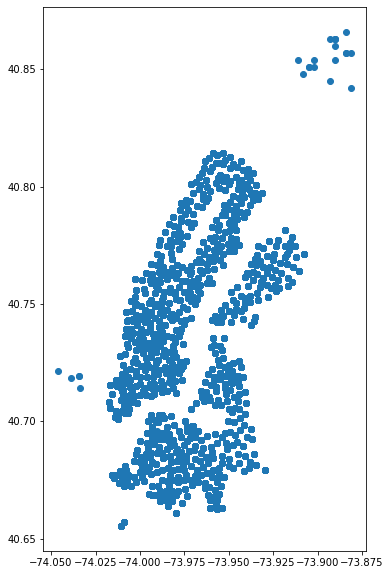

In [68]:
citistartgeo.plot(figsize=(10,10))

<AxesSubplot:>

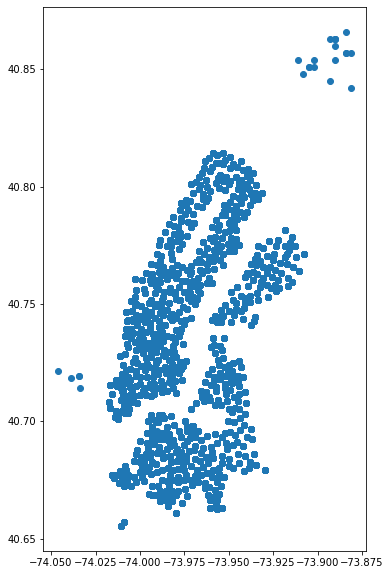

In [57]:
citigeo.plot(figsize=(10,10))

In [23]:
citistartgeo.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,geometry
0,320,2019-01-01 00:01:47.4010,2019-01-01 00:07:07.5810,3160.0,Central Park West & W 76 St,40.778968,-73.973747,3283.0,W 89 St & Columbus Ave,40.788221,-73.970416,15839,Subscriber,1971,1,POINT (-73.97375 40.77897)
1,316,2019-01-01 00:04:43.7360,2019-01-01 00:10:00.6080,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,40.747804,-73.973442,32723,Subscriber,1964,1,POINT (-73.97771 40.75187)
2,591,2019-01-01 00:06:03.9970,2019-01-01 00:15:55.4380,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154.0,E 77 St & 3 Ave,40.773142,-73.958562,27451,Subscriber,1987,1,POINT (-73.97667 40.78525)
3,2719,2019-01-01 00:07:03.5450,2019-01-01 00:52:22.6500,504.0,1 Ave & E 16 St,40.732219,-73.981656,3709.0,W 15 St & 6 Ave,40.738046,-73.996430,21579,Subscriber,1990,1,POINT (-73.98166 40.73222)
4,303,2019-01-01 00:07:35.9450,2019-01-01 00:12:39.5020,229.0,Great Jones St,40.727434,-73.993790,503.0,E 20 St & Park Ave,40.738274,-73.987520,35379,Subscriber,1979,1,POINT (-73.99379 40.72743)


Text(0.5, 1.0, 'entries and subway stations in New York City')

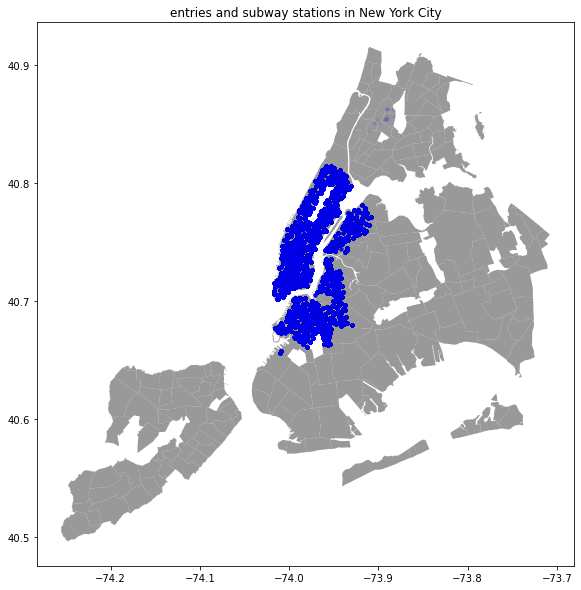

In [24]:
fig, ax = plt.subplots(figsize=(20,10))
neighbourhoods.plot(ax=ax, alpha=0.8,color='grey')
#stationgeo.plot(ax=ax, legend=True, color='red', markersize=10)
citistartgeo.plot(ax=ax, legend=True, color='blue', markersize=10, alpha=0.05)
plt.title('entries and subway stations in New York City')

In [25]:
neighbourhoods.head()

,neighbourhood,neighbourhood_group,geometry
0,Bayswater,Queens,"MULTIPOLYGON (((-73.76671 40.61491, -73.76825 ..."
1,Allerton,Bronx,"MULTIPOLYGON (((-73.84860 40.87167, -73.84582 ..."
2,City Island,Bronx,"MULTIPOLYGON (((-73.78282 40.84392, -73.78257 ..."
3,Ditmars Steinway,Queens,"MULTIPOLYGON (((-73.90160 40.76777, -73.90391 ..."
4,Ozone Park,Queens,"MULTIPOLYGON (((-73.83754 40.69136, -73.83108 ..."


<AxesSubplot:>

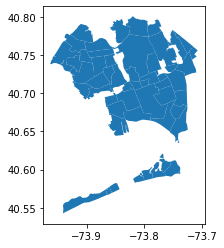

In [18]:
Queens = neighbourhoods[neighbourhoods.neighbourhood_group == 'Queens']
Queens.plot()

<AxesSubplot:>

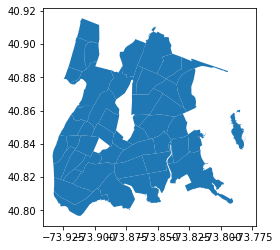

In [19]:
Bronx = neighbourhoods[neighbourhoods.neighbourhood_group == 'Bronx']
Bronx.plot()

In [32]:
stationgeo.head()

,ogc_fid,station_id,complex_id,gtfs_stop_id,division,line,stop_name,borough,daytime_routes,structure,gtfs_latitude,gtfs_longitude,north_direction_label,south_direction_label,geometry
0,1,1.0,1,R01,BMT,Astoria,Astoria - Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034,NaN,Manhattan,POINT (-73.91203 40.77504)
1,2,2.0,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843,Ditmars Blvd,Manhattan,POINT (-73.91784 40.77026)
2,3,3.0,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479,Astoria - Ditmars Blvd,Manhattan,POINT (-73.92148 40.76678)
3,4,4.0,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508,Astoria - Ditmars Blvd,Manhattan,POINT (-73.92551 40.76182)
4,5,5.0,5,R06,BMT,Astoria,36 Av,Q,N W,Elevated,40.756804,-73.929575,Astoria - Ditmars Blvd,Manhattan,POINT (-73.92957 40.75680)


### Citibike Location and Subway Stations in Queens

In [20]:
station_queens = gpd.sjoin(stationgeo, Queens, op='intersects')
station_queens.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  """Entry point for launching an IPython kernel.


,ogc_fid,station_id,complex_id,gtfs_stop_id,division,line,stop_name,borough,daytime_routes,structure,gtfs_latitude,gtfs_longitude,north_direction_label,south_direction_label,geometry,index_right,neighbourhood,neighbourhood_group
0,1,1.0,1,R01,BMT,Astoria,Astoria - Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034,NaN,Manhattan,POINT (-73.91203 40.77504),3,Ditmars Steinway,Queens
1,2,2.0,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843,Ditmars Blvd,Manhattan,POINT (-73.91784 40.77026),15,Astoria,Queens
2,3,3.0,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479,Astoria - Ditmars Blvd,Manhattan,POINT (-73.92148 40.76678),15,Astoria,Queens
270,271,270.0,270,G18,IND,Queens Blvd,46 St,Q,M R,Subway,40.756312,-73.913333,Forest Hills,Manhattan,POINT (-73.91333 40.75631),15,Astoria,Queens
271,272,271.0,271,G19,IND,Queens Blvd,Steinway St,Q,M R,Subway,40.756879,-73.920740,Forest Hills,Manhattan,POINT (-73.92074 40.75688),15,Astoria,Queens


In [21]:
within_queens_start = gpd.sjoin(citistartgeo, Queens, op='intersects')
within_queens_start.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  """Entry point for launching an IPython kernel.


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,geometry,start_geo,index_right,neighbourhood,neighbourhood_group
140,552,2019-01-01 01:00:51.1790,2019-01-01 01:10:03.5240,3595.0,35 St & Broadway,40.760339,-73.922243,3561.0,37 Ave & 35 St,40.753111,-73.927992,14740,Subscriber,1994,1,POINT (-73.92799 40.75311),POINT (-73.92224 40.76034),15,Astoria,Queens
164,484,2019-01-01 01:06:08.6190,2019-01-01 01:14:13.0410,3598.0,Newton Rd & 44 St,40.759570,-73.914268,3568.0,34 St & 35 Ave,40.756933,-73.926223,33837,Subscriber,1969,0,POINT (-73.92622 40.75693),POINT (-73.91427 40.75957),15,Astoria,Queens
265,282,2019-01-01 01:35:01.1000,2019-01-01 01:39:43.8690,3721.0,31 St & Newtown Ave,40.767549,-73.920933,3612.0,30 Ave & 21 St,40.770374,-73.928608,25655,Subscriber,1990,1,POINT (-73.92861 40.77037),POINT (-73.92093 40.76755),15,Astoria,Queens
296,204,2019-01-01 01:40:16.6720,2019-01-01 01:43:40.9420,3513.0,21 St & Hoyt Ave S,40.774645,-73.923706,3514.0,Astoria Park S & Shore Blvd,40.776700,-73.927631,17513,Subscriber,1978,1,POINT (-73.92763 40.77670),POINT (-73.92371 40.77464),15,Astoria,Queens
354,421,2019-01-01 01:50:43.2880,2019-01-01 01:57:44.5370,3570.0,35 Ave & 37 St,40.755733,-73.923661,3646.0,35 Ave & 10 St,40.763155,-73.939855,33980,Subscriber,1989,1,POINT (-73.93986 40.76315),POINT (-73.92366 40.75573),15,Astoria,Queens


In [22]:
within_queens_end = gpd.sjoin(citiendgeo, Queens, op='intersects')
within_queens_end.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  """Entry point for launching an IPython kernel.


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,geometry,start_geo,index_right,neighbourhood,neighbourhood_group
132,1621,2019-01-01 00:59:38.0020,2019-01-01 01:26:39.5830,3016.0,Kent Ave & N 7 St,40.720368,-73.961651,3609.0,Vernon Blvd & 31 Ave,40.769247,-73.935450,32761,Subscriber,1984,1,POINT (-73.93545 40.76925),POINT (-73.96165 40.72037),15,Astoria,Queens
164,484,2019-01-01 01:06:08.6190,2019-01-01 01:14:13.0410,3598.0,Newton Rd & 44 St,40.759570,-73.914268,3568.0,34 St & 35 Ave,40.756933,-73.926223,33837,Subscriber,1969,0,POINT (-73.92622 40.75693),POINT (-73.91427 40.75957),15,Astoria,Queens
265,282,2019-01-01 01:35:01.1000,2019-01-01 01:39:43.8690,3721.0,31 St & Newtown Ave,40.767549,-73.920933,3612.0,30 Ave & 21 St,40.770374,-73.928608,25655,Subscriber,1990,1,POINT (-73.92861 40.77037),POINT (-73.92093 40.76755),15,Astoria,Queens
393,412,2019-01-01 01:57:16.5880,2019-01-01 02:04:09.2140,3516.0,31 St & Astoria Blvd,40.769918,-73.918406,3595.0,35 St & Broadway,40.760339,-73.922243,31022,Subscriber,1980,1,POINT (-73.92224 40.76034),POINT (-73.91841 40.76992),15,Astoria,Queens
520,467,2019-01-01 02:25:10.7280,2019-01-01 02:32:58.4430,3614.0,Crescent St & 30 Ave,40.768692,-73.924957,3721.0,31 St & Newtown Ave,40.767549,-73.920933,33959,Subscriber,1977,1,POINT (-73.92093 40.76755),POINT (-73.92496 40.76869),15,Astoria,Queens


Text(0.5, 1.0, 'Citibike Start Location and Subway Stations in Queens')

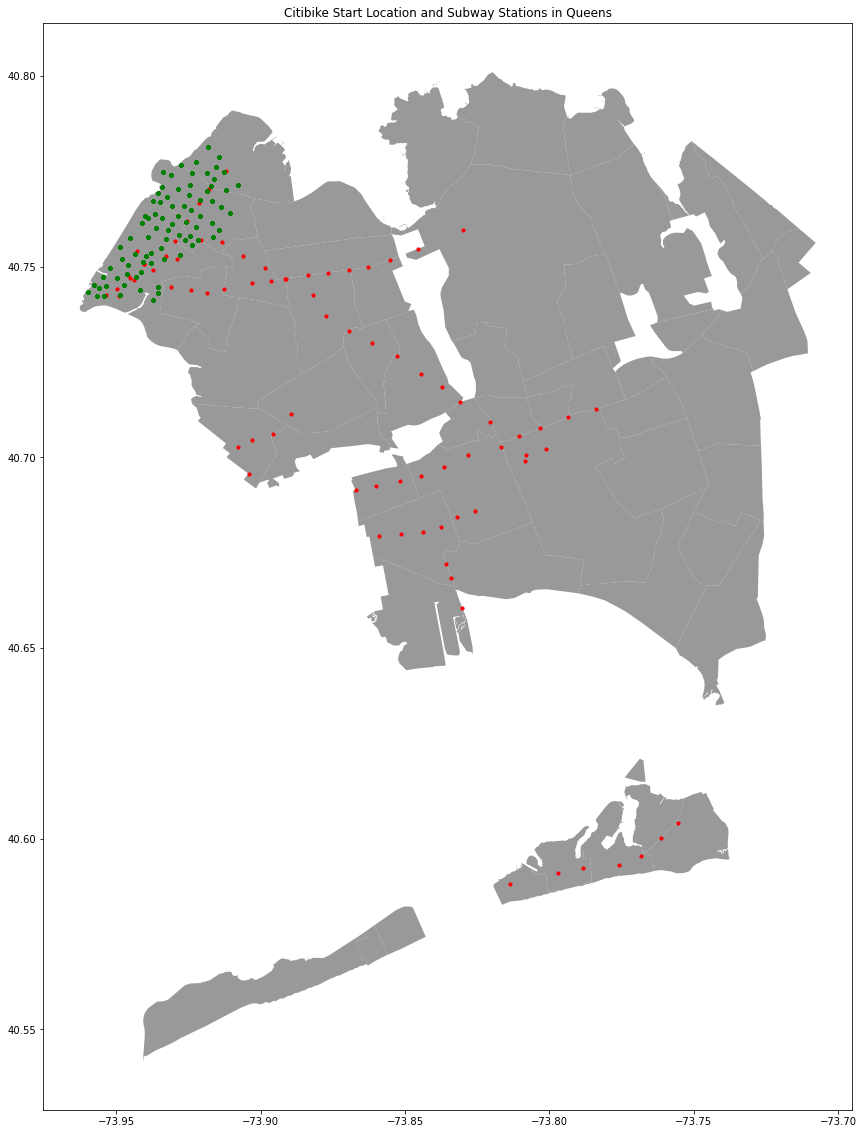

In [89]:
fig, ax = plt.subplots(figsize=(20,20))
Queens.plot(ax=ax, alpha=0.8, color='grey')
station_queens.plot(ax=ax, legend=True, color='red', markersize=10)
within_queens_start.plot(ax=ax, legend=True, color='green', markersize=10)
#within_queens_end.plot(ax=ax, legend=True, color='blue', markersize=10, alpha=0.1)

plt.title('Citibike Start Location and Subway Stations in Queens')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Citibike Start Location and Subway Station in Queens')

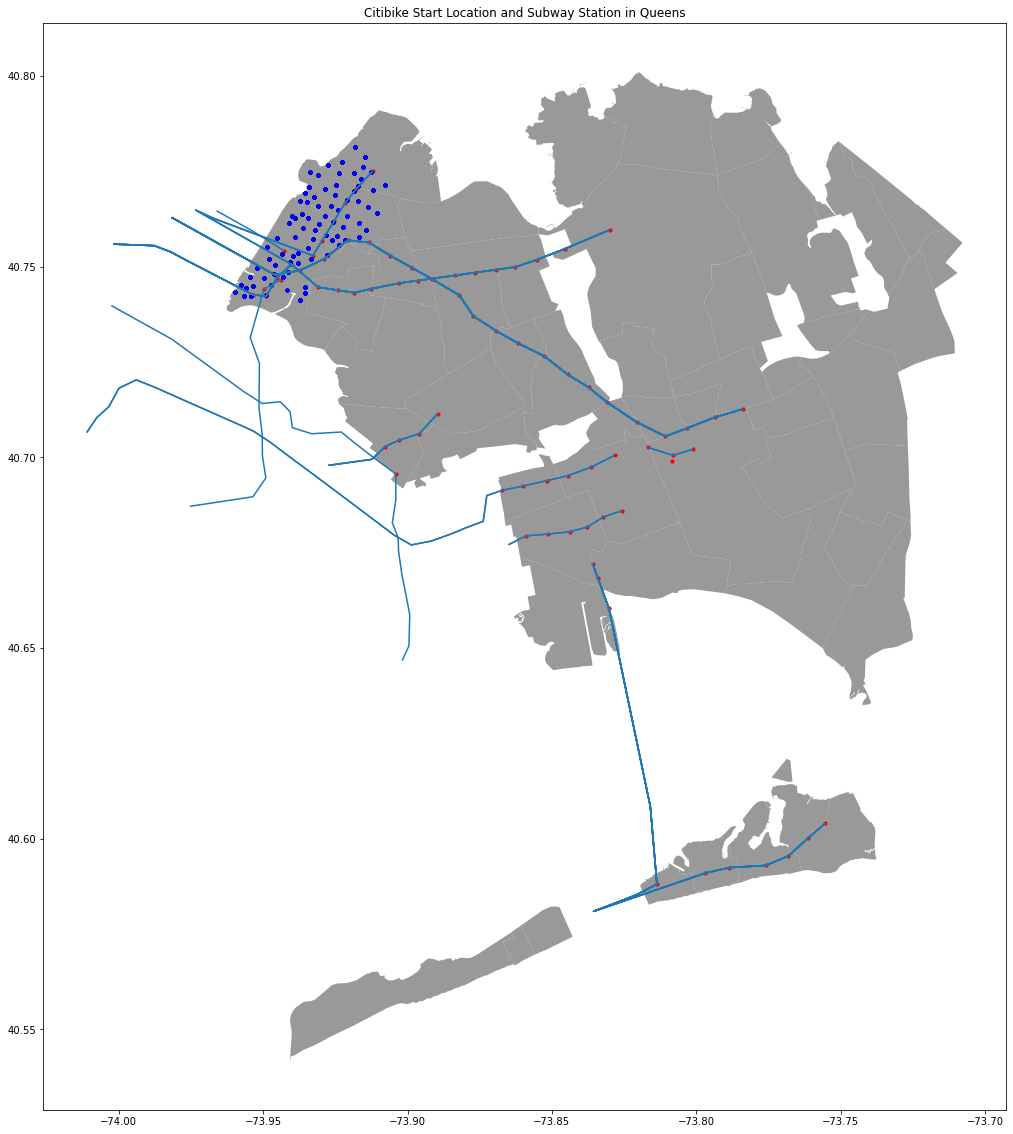

In [135]:
fig, ax = plt.subplots(figsize=(20,20))
Queens.plot(ax=ax, alpha=0.8, color='grey')
gpd.sjoin(subwayline, Queens, op='intersects').plot(ax=ax)
station_queens.plot(ax=ax, legend=True, color='red', markersize=10)
#within_queens_start.plot(ax=ax, legend=True, color='green', markersize=10)
within_queens_end.plot(ax=ax, legend=True, color='blue', markersize=10, alpha=0.1)

plt.title('Citibike Start Location and Subway Station in Queens')

### Citibike Location and Subway Stations in Bronx

In [23]:
station_bronx = gpd.sjoin(stationgeo, Bronx, op='intersects')
station_bronx.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  """Entry point for launching an IPython kernel.


,ogc_fid,station_id,complex_id,gtfs_stop_id,division,line,stop_name,borough,daytime_routes,structure,gtfs_latitude,gtfs_longitude,north_direction_label,south_direction_label,geometry,index_right,neighbourhood,neighbourhood_group
210,211,210.0,210,D01,IND,Concourse,Norwood - 205 St,Bx,D,Subway,40.874811,-73.878855,NaN,Manhattan,POINT (-73.87886 40.87481),150,Norwood,Bronx
211,212,211.0,211,D03,IND,Concourse,Bedford Park Blvd,Bx,B D,Subway,40.873244,-73.887138,Norwood - 205 St,Manhattan,POINT (-73.88714 40.87324),150,Norwood,Bronx
378,379,378.0,378,401,IRT,Jerome Av,Woodlawn,Bx,4,Elevated,40.886037,-73.878751,NaN,Manhattan,POINT (-73.87875 40.88604),150,Norwood,Bronx
379,380,379.0,379,402,IRT,Jerome Av,Mosholu Pkwy,Bx,4,Elevated,40.879750,-73.884655,Woodlawn,Manhattan,POINT (-73.88466 40.87975),150,Norwood,Bronx
212,213,212.0,212,D04,IND,Concourse,Kingsbridge Rd,Bx,B D,Subway,40.866978,-73.893509,Bedford Pk Blvd & 205 St,Manhattan,POINT (-73.89351 40.86698),5,Fordham,Bronx


In [24]:
within_bronx_start = gpd.sjoin(citistartgeo, Bronx, op='intersects')
within_bronx_start.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  """Entry point for launching an IPython kernel.


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,geometry,start_geo,index_right,neighbourhood,neighbourhood_group
248483,2358,2019-01-08 13:48:13.8120,2019-01-08 14:27:32.0160,NaN,NaN,40.854,-73.890,NaN,NaN,40.857,-73.881,34550,Subscriber,1992,1,POINT (-73.88100 40.85700),POINT (-73.89000 40.85400),11,Belmont,Bronx
249690,3358,2019-01-08 14:29:31.5150,2019-01-08 15:25:29.7130,NaN,NaN,40.857,-73.884,NaN,NaN,40.857,-73.884,34550,Subscriber,1992,1,POINT (-73.88400 40.85700),POINT (-73.88400 40.85700),11,Belmont,Bronx
396461,393,2019-01-12 12:36:01.1440,2019-01-12 12:42:34.9520,NaN,NaN,40.854,-73.890,NaN,NaN,40.857,-73.884,34536,Customer,1997,1,POINT (-73.88400 40.85700),POINT (-73.89000 40.85400),11,Belmont,Bronx
406295,214,2019-01-12 17:11:01.7110,2019-01-12 17:14:36.5420,NaN,NaN,40.854,-73.890,NaN,NaN,40.854,-73.890,34887,Subscriber,1985,0,POINT (-73.89000 40.85400),POINT (-73.89000 40.85400),11,Belmont,Bronx
407649,2949,2019-01-12 17:59:16.4130,2019-01-12 18:48:26.2400,NaN,NaN,40.854,-73.902,NaN,NaN,40.860,-73.890,34447,Subscriber,1992,1,POINT (-73.89000 40.86000),POINT (-73.90200 40.85400),11,Belmont,Bronx


In [25]:
within_bronx_end = gpd.sjoin(citiendgeo, Bronx, op='intersects')
within_bronx_end.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  """Entry point for launching an IPython kernel.


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,geometry,start_geo,index_right,neighbourhood,neighbourhood_group
248483,2358,2019-01-08 13:48:13.8120,2019-01-08 14:27:32.0160,NaN,NaN,40.854,-73.890,NaN,NaN,40.857,-73.881,34550,Subscriber,1992,1,POINT (-73.88100 40.85700),POINT (-73.89000 40.85400),11,Belmont,Bronx
249690,3358,2019-01-08 14:29:31.5150,2019-01-08 15:25:29.7130,NaN,NaN,40.857,-73.884,NaN,NaN,40.857,-73.884,34550,Subscriber,1992,1,POINT (-73.88400 40.85700),POINT (-73.88400 40.85700),11,Belmont,Bronx
396461,393,2019-01-12 12:36:01.1440,2019-01-12 12:42:34.9520,NaN,NaN,40.854,-73.890,NaN,NaN,40.857,-73.884,34536,Customer,1997,1,POINT (-73.88400 40.85700),POINT (-73.89000 40.85400),11,Belmont,Bronx
406295,214,2019-01-12 17:11:01.7110,2019-01-12 17:14:36.5420,NaN,NaN,40.854,-73.890,NaN,NaN,40.854,-73.890,34887,Subscriber,1985,0,POINT (-73.89000 40.85400),POINT (-73.89000 40.85400),11,Belmont,Bronx
407649,2949,2019-01-12 17:59:16.4130,2019-01-12 18:48:26.2400,NaN,NaN,40.854,-73.902,NaN,NaN,40.860,-73.890,34447,Subscriber,1992,1,POINT (-73.89000 40.86000),POINT (-73.90200 40.85400),11,Belmont,Bronx


Text(0.5, 1.0, 'Citibike Start Location and Subway Station in Bronx')

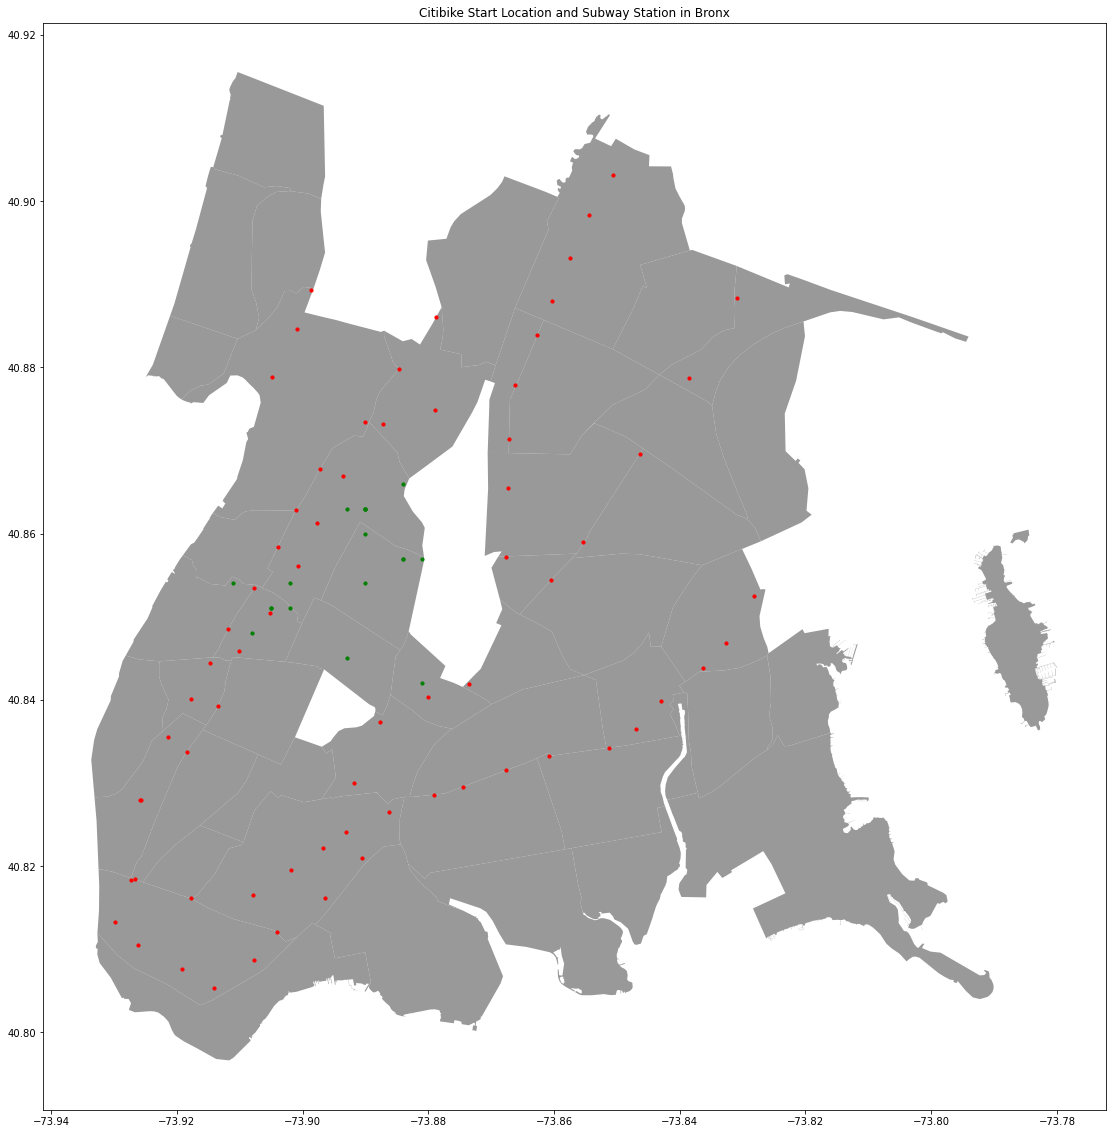

In [137]:
fig, ax = plt.subplots(figsize=(20,20))
Bronx.plot(ax=ax, alpha=0.8,color='grey')
#subwayline.plot(ax=ax)
station_bronx.plot(ax=ax, legend=True, color='red', markersize=10)
within_bronx_start.plot(ax=ax, legend=True, color='green', markersize=10)
#within_bronx_end.plot(ax=ax, legend=True, color='blue', markersize=10)
plt.title('Citibike Start Location and Subway Station in Bronx')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Citibike End Location and Subway Station in Bronx')

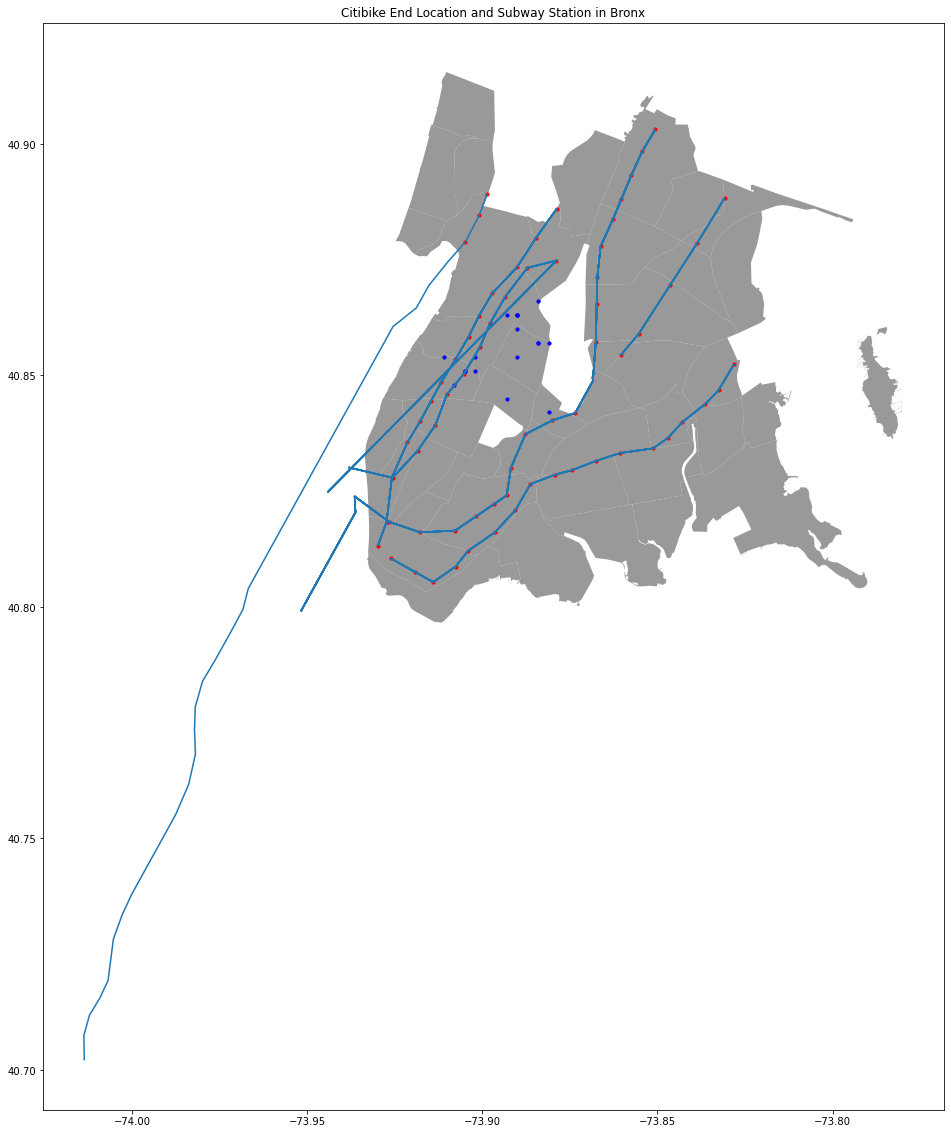

In [138]:
fig, ax = plt.subplots(figsize=(20,20))
Bronx.plot(ax=ax, alpha=0.8,color='grey')
gpd.sjoin(subwayline, Bronx, op='intersects').plot(ax=ax)
station_bronx.plot(ax=ax, legend=True, color='red', markersize=10)
#within_bronx_start.plot(ax=ax, legend=True, color='green', markersize=10)
within_bronx_end.plot(ax=ax, legend=True, color='blue', markersize=10)
plt.title('Citibike End Location and Subway Station in Bronx')

In [100]:
stationgeo.head()

,ogc_fid,station_id,complex_id,gtfs_stop_id,division,line,stop_name,borough,daytime_routes,structure,gtfs_latitude,gtfs_longitude,north_direction_label,south_direction_label,geometry
0,1,1.0,1,R01,BMT,Astoria,Astoria - Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034,NaN,Manhattan,POINT (-73.91203 40.77504)
1,2,2.0,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843,Ditmars Blvd,Manhattan,POINT (-73.91784 40.77026)
2,3,3.0,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479,Astoria - Ditmars Blvd,Manhattan,POINT (-73.92148 40.76678)
3,4,4.0,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508,Astoria - Ditmars Blvd,Manhattan,POINT (-73.92551 40.76182)
4,5,5.0,5,R06,BMT,Astoria,36 Av,Q,N W,Elevated,40.756804,-73.929575,Astoria - Ditmars Blvd,Manhattan,POINT (-73.92957 40.75680)


In [107]:
stationgeo.line.unique()

array(['Astoria', 'Broadway - Brighton', 'Broadway', 'Manhattan Bridge',
       '4th Av', 'Sea Beach / West End / Culver / Brighton', 'West End',
       'Sea Beach', 'Jamaica', 'Myrtle Av', 'Canarsie',
       'Franklin Shuttle', '8th Av - Fulton St', 'Concourse',
       '6th Av - Culver', 'Liberty Av', 'Rockaway', '63rd St',
       'Queens Blvd', 'Queens - Archer', 'Crosstown', 'Broadway - 7Av',
       'Clark St', 'Eastern Pky', 'Nostrand', 'Pelham', 'Jerome Av',
       'Lexington Av', 'Lenox - White Plains Rd', 'Dyre Av', 'Flushing',
       'Lexington - Shuttle', 'Second Av', 'Staten Island', nan],
      dtype=object)

<AxesSubplot:>

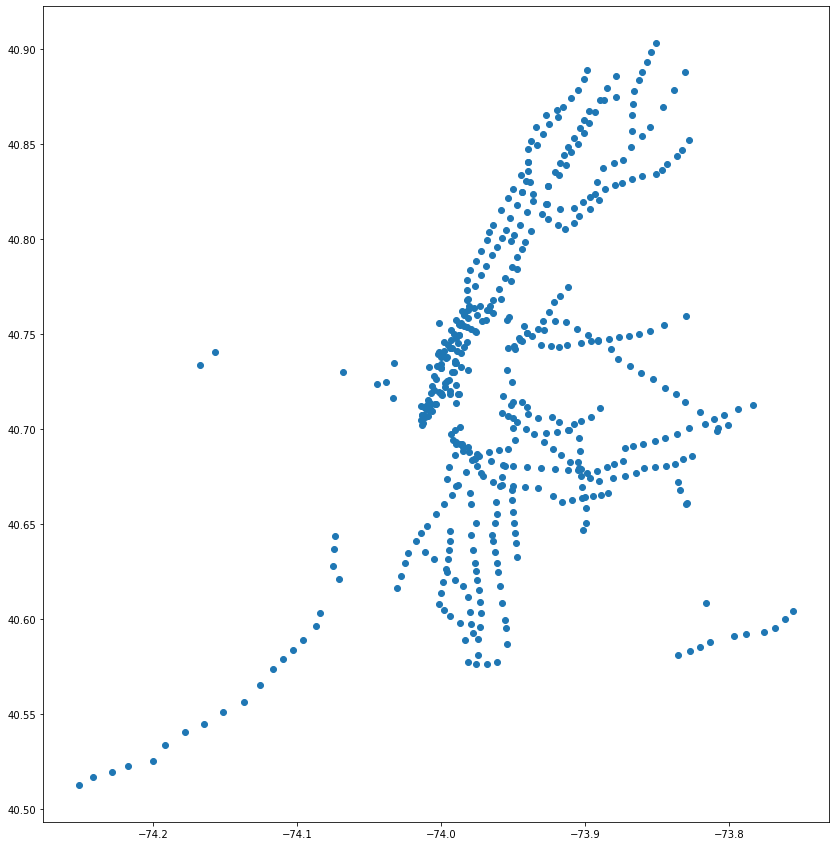

In [105]:
stationgeo.plot(figsize=(15,15))

In [27]:
stationline = stationgeo[['station_id','line','stop_name','borough', 'gtfs_latitude', 'gtfs_longitude']]
stationline.head()

,station_id,line,stop_name,borough,gtfs_latitude,gtfs_longitude
0,1.0,Astoria,Astoria - Ditmars Blvd,Q,40.775036,-73.912034
1,2.0,Astoria,Astoria Blvd,Q,40.770258,-73.917843
2,3.0,Astoria,30 Av,Q,40.766779,-73.921479
3,4.0,Astoria,Broadway,Q,40.761820,-73.925508
4,5.0,Astoria,36 Av,Q,40.756804,-73.929575


In [28]:
from shapely.geometry import LineString,Point

# groupby different lines
station_line = stationline.groupby('line')

tb = []
geomList = []
for name,group in station_line:
    # [0,:5] as the attribute of the new df
    #tb.append(group.iloc[0,:5])
    # zip the location into a list
    xyList = [xy for xy in zip(group.gtfs_longitude, group.gtfs_latitude)]

    try:
    # line(s) that may throw an error
        line = LineString(xyList)
        geomList.append(line)

    except ValueError:
    # either do something or continue
        pass
        continue
    tb.append(group.iloc[0,:5])
        
# connect the points in the same line
subwayline = gpd.GeoDataFrame(tb, geometry=geomList)

In [29]:
subwayline.head()

,station_id,line,stop_name,borough,gtfs_latitude,geometry
26,27.0,4th Av,Atlantic Av - Barclays Ctr,Bk,40.683666,"LINESTRING (-73.97881 40.68367, -73.98311 40.6..."
221,221.0,63rd St,21 St - Queensbridge,Q,40.754203,"LINESTRING (-73.94284 40.75420, -73.95326 40.7..."
167,167.0,6th Av - Culver,W 4 St,M,40.732338,"LINESTRING (-74.00050 40.73234, -73.97745 40.7..."
141,143.0,8th Av - Fulton St,Inwood - 207 St,M,40.868072,"LINESTRING (-73.91990 40.86807, -73.92727 40.8..."
0,1.0,Astoria,Astoria - Ditmars Blvd,Q,40.775036,"LINESTRING (-73.91203 40.77504, -73.91784 40.7..."


In [126]:
stationline.shape

(513, 6)

In [127]:
subwayline.shape

(32, 6)

<AxesSubplot:>

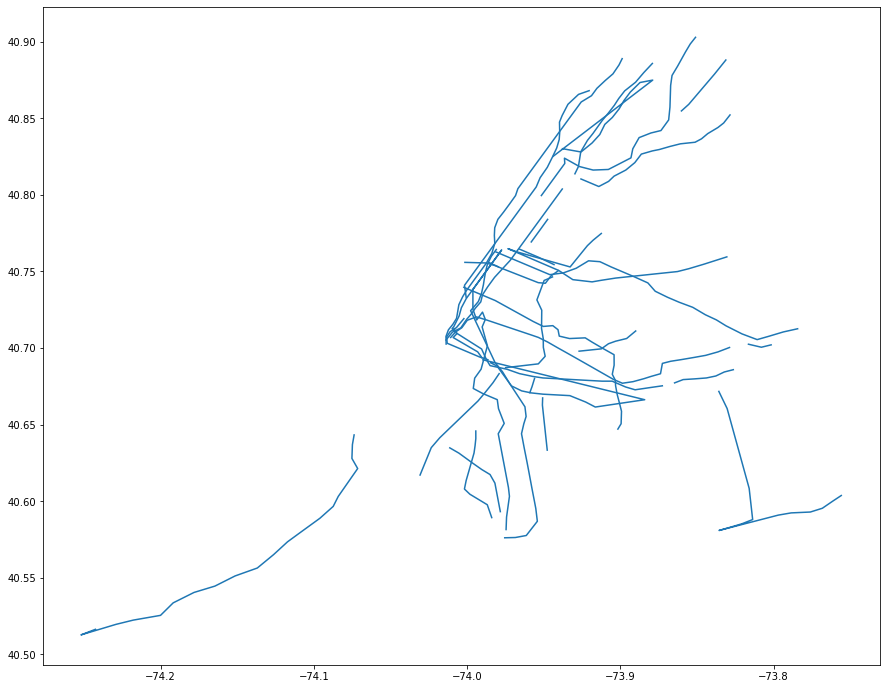

In [129]:
subwayline.plot(figsize=(15,15))

Text(0.5, 1.0, 'Citibike and Subway line in the Bronx and Queens')

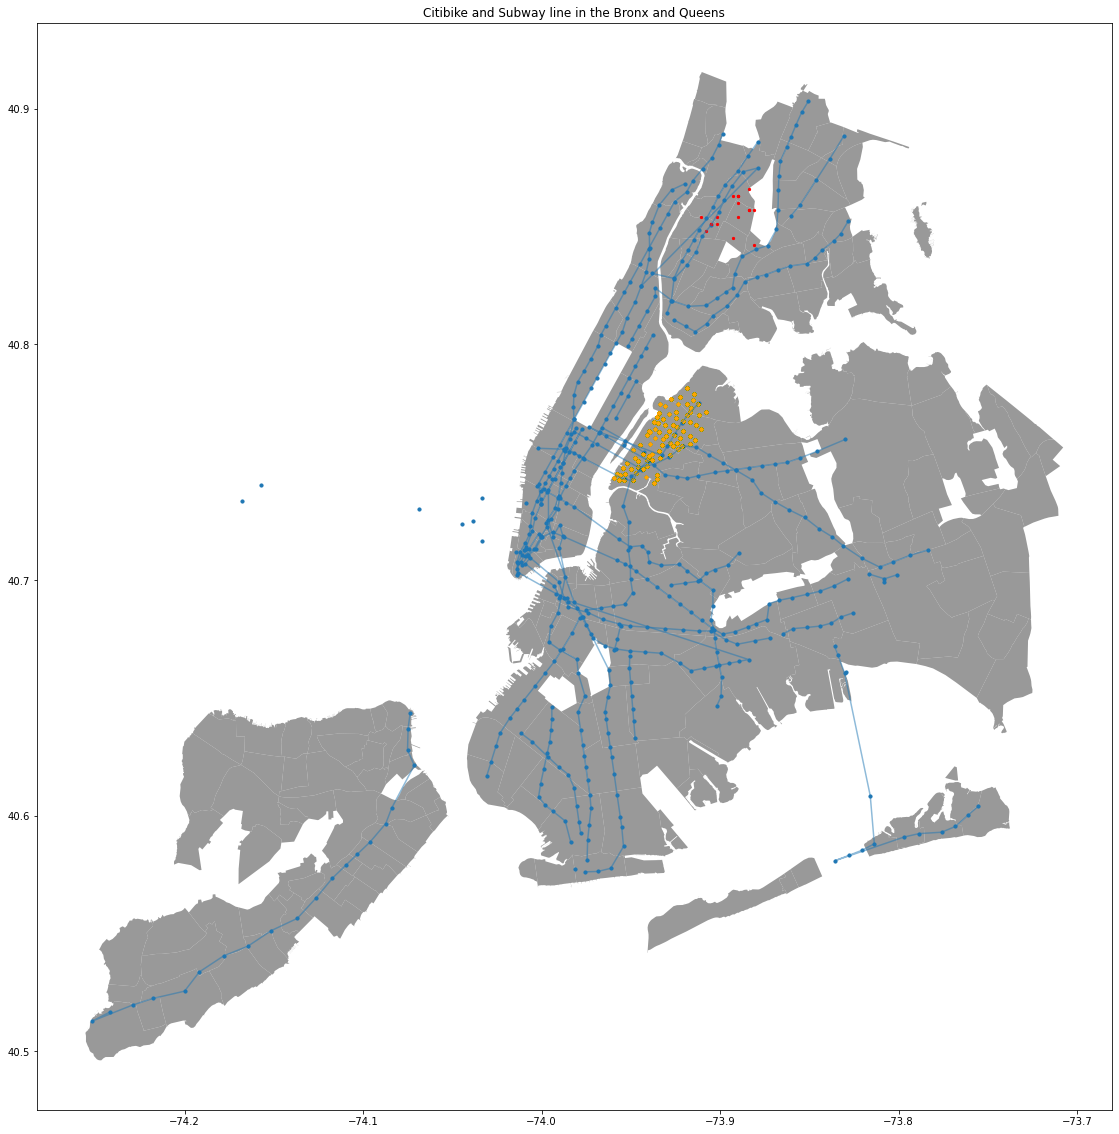

In [37]:
fig, ax = plt.subplots(figsize=(20,20))
neighbourhoods.plot(ax=ax, alpha=0.8,color='grey')
subwayline.plot(ax=ax, alpha=0.5)
stationgeo.plot(ax=ax, legend=True, markersize=10)
within_bronx_end.plot(ax=ax, legend=True, color='red', markersize=5)
within_queens_end.plot(ax=ax, legend=True, color='orange', markersize=5)
#citistartgeo.plot(ax=ax, legend=True, color='blue', markersize=10, alpha=0.05)
plt.title('Citibike and Subway line in the Bronx and Queens')